<a href="https://colab.research.google.com/github/syedshubha/TeachingQuantumComputing/blob/main/DensityMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import *
from sympy import I as i
from sympy.physics.quantum import *

In [3]:
id = Matrix([[1,0],[0,1]])
id

Matrix([
[1, 0],
[0, 1]])

In [4]:
Z = Matrix([[1,0],[0,-1]])
X = Matrix([[0,1],[1,0]])

In [7]:
Y = i*X*Z
Y

Matrix([
[0, -I],
[I,  0]])

$R_x (\theta) = e^{-i\theta X/2}$

In [8]:
x = symbols('x')
Rx = exp(-i*x*X/2)

In [10]:
simplify(Rx)

Matrix([
[   cos(x/2), -I*sin(x/2)],
[-I*sin(x/2),    cos(x/2)]])

In [15]:
I = id

$H= I\otimes X + Z \otimes I$

$e^H = e^Z \otimes e^X$

In [12]:
# I⊗X
TensorProduct(id,X)

Matrix([
[0, 1, 0, 0],
[1, 0, 0, 0],
[0, 0, 0, 1],
[0, 0, 1, 0]])

In [14]:
# X⊗I
TensorProduct(X,id)

Matrix([
[0, 0, 1, 0],
[0, 0, 0, 1],
[1, 0, 0, 0],
[0, 1, 0, 0]])

In [17]:
H = TensorProduct(I,X) + TensorProduct(Z,I)
A = exp(H)

In [18]:
B = exp(Z)
C = exp(X)
D = TensorProduct(B,C)

In [21]:
A

Matrix([
[ 1/2 + exp(2)/2, -1/2 + exp(2)/2,               0,               0],
[-1/2 + exp(2)/2,  1/2 + exp(2)/2,               0,               0],
[              0,               0, exp(-2)/2 + 1/2, 1/2 - exp(-2)/2],
[              0,               0, 1/2 - exp(-2)/2, exp(-2)/2 + 1/2]])

In [24]:
D

Matrix([
[E,       0],
[0, exp(-1)]])xMatrix([
[ exp(-1)/2 + E/2, -exp(-1)/2 + E/2],
[-exp(-1)/2 + E/2,  exp(-1)/2 + E/2]])

In [25]:
M = Matrix([[1+i,1-i],[2, 3+i]])
M

Matrix([
[1 + I, 1 - I],
[    2, 3 + I]])

In [26]:
Dagger(M)

Matrix([
[1 - I,     2],
[1 + I, 3 - I]])

In [27]:
!pip install --quiet qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.4 MB/s eta 0:00:00


In [28]:
!pip install --quiet pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [29]:
from qiskit import *
from qiskit.quantum_info import *

In [30]:
Bell = QuantumCircuit(2)
Bell.h(0)
Bell.cx(0,1)
Bell.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

State = $|\phi ^+ \rangle$
Density Matrix = $|\phi ^+ \rangle \langle \phi ^+| $

In [31]:
rho_AB = DensityMatrix.from_instruction(Bell)
rho_AB.draw('latex', prefix="\\rho_{AB} = ")

<IPython.core.display.Latex object>

$(0.6, |0 ⟩), (0.4, |+⟩) $

$\rho = 0.6 |0 ⟩ ⟨0| + 0.4 |+⟩ ⟨+|   $

In [34]:
q = QuantumCircuit(1)
rho = DensityMatrix.from_instruction(q)
rho.draw('latex', prefix="\\rho = ")

<IPython.core.display.Latex object>

In [36]:
q = QuantumCircuit(1)
q.h(0)
rho = DensityMatrix.from_instruction(q)
rho.draw('latex', prefix="\\rho = ")

<IPython.core.display.Latex object>

In [33]:
state1 = DensityMatrix.from_label('0')
state1.draw('latex', prefix="|0 ⟩ ⟨0| = ")

<IPython.core.display.Latex object>

In [35]:
state2 = DensityMatrix.from_label('+')
state2.draw('latex', prefix="|+⟩ ⟨+| = ")

<IPython.core.display.Latex object>

In [37]:
state = 0.6*state1 + 0.4*state2 #Density Matrix
state.draw('latex', prefix="0.6|0⟩ ⟨0|+0.4|+⟩ ⟨+| = ")

<IPython.core.display.Latex object>

In [38]:
from qiskit.visualization import plot_bloch_multivector as bloch

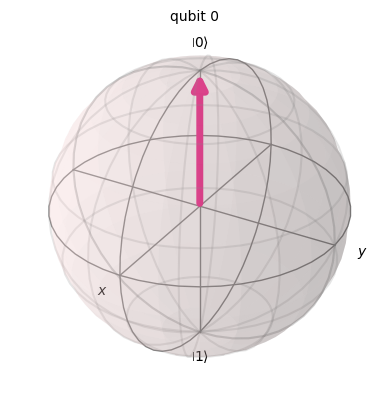

In [39]:
bloch(state1)

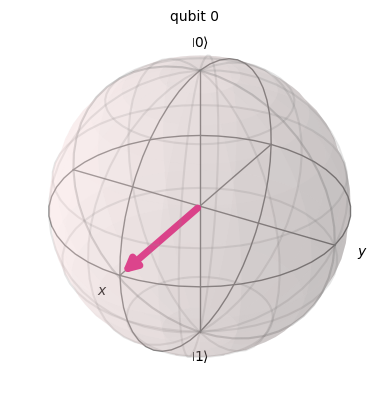

In [40]:
bloch(state2)

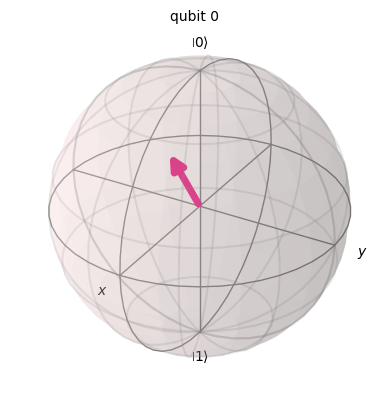

In [41]:
bloch(state)

In [42]:
state.purity()

(0.7599999999999999+0j)

In [43]:
(4/5)**2 + 3*(1/5)**2

0.7600000000000001

In [44]:
max = 0.5*(DensityMatrix.from_label('0')+DensityMatrix.from_label('1')) #maximally mixed
max.draw("latex")

<IPython.core.display.Latex object>

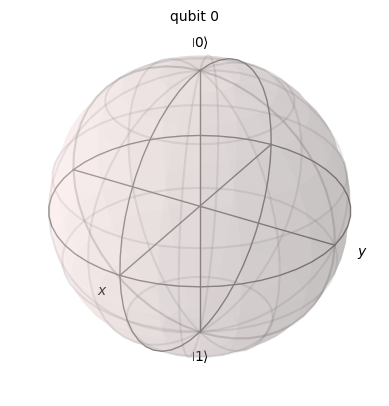

In [45]:
bloch(max)

In [46]:
max.purity()

(0.5+0j)

In [52]:
q = QuantumCircuit(2)
q.initialize([0.6,-0.8],0)
q.initialize([0.8,0.6],1)
q.cx(0,1)
q.h(0)
q.z(1)
q.draw()

┌──────────────────────┐     ┌───┐
q_0: ┤ Initialize(0.6,-0.8) ├──■──┤ H ├
     ├─────────────────────┬┘┌─┴─┐├───┤
q_1: ┤ Initialize(0.8,0.6) ├─┤ X ├┤ Z ├
     └─────────────────────┘ └───┘└───┘

In [53]:
D = DensityMatrix.from_instruction(q)
D.draw("latex")

<IPython.core.display.Latex object>

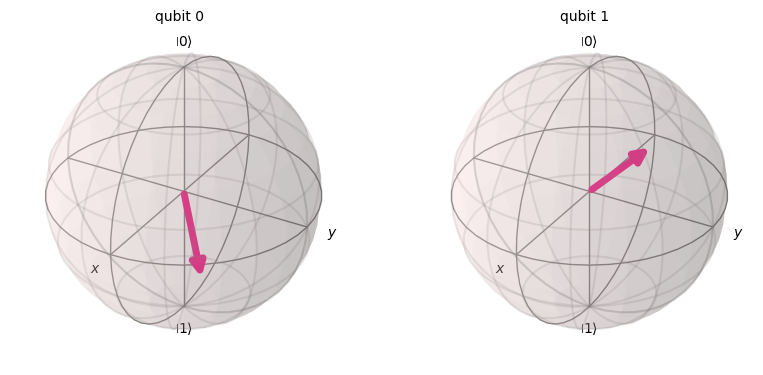

In [54]:
bloch(D)

In [55]:
DA = partial_trace(D,[1]) #reduced state
DA.draw("latex")

<IPython.core.display.Latex object>

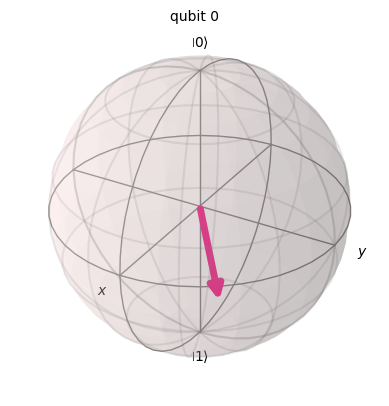

In [56]:
bloch(DA)

In [57]:
DB = partial_trace(D,[0])
DB.draw("latex")

<IPython.core.display.Latex object>

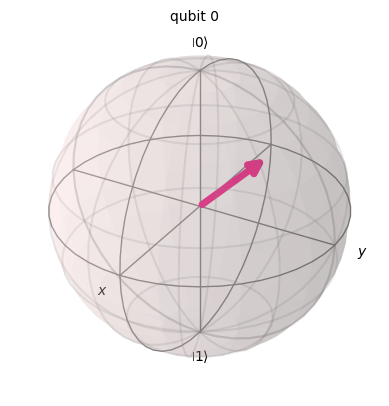

In [58]:
bloch(DB)

In [59]:
D.purity()

(0.9999999999999996+2.872144145020116e-33j)

In [60]:
DA.purity()

(0.9638732799999996+0j)

In [61]:
DB.purity()

(0.9638732799999996+0j)